In [104]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
feature = pd.read_csv('feature.csv', error_bad_lines=False)
feature = feature[feature.columns[0:2]]

In [9]:
# (1) cleaning the data
print(set([train[i].dtype for i in train.columns]))
#there're three kind of type: int64,float64 and object
print(train.select_dtypes(['object']).head())
feature[feature.name.isin(['dependency','edjefe','edjefa'])]

{dtype('float64'), dtype('O'), dtype('int64')}
             Id    idhogar dependency edjefe edjefa
0  ID_279628684  21eb7fcc1         no     10     no
1  ID_f29eb3ddd  0e5d7a658          8     12     no
2  ID_68de51c94  2c7317ea8          8     no     11
3  ID_d671db89c  2b58d945f        yes     11     no
4  ID_d56d6f5f5  2b58d945f        yes     11     no


,name,description
99,dependency,Dependency rate
100,edjefe,years of education of male head of household
101,edjefa,years of education of female head of household


In [10]:
train.dependency = train.dependency.replace({"yes": 1, "no": 0}).astype(np.float64)
train.edjefa = train.edjefa.replace({"yes": 1, "no": 0}).astype(np.float64)
train.edjefe = train.edjefe.replace({"yes": 1, "no": 0}).astype(np.float64)
#Now,the only 'object' data is 'idhogar'

In [11]:
print(train.select_dtypes(['object']).head())

             Id    idhogar
0  ID_279628684  21eb7fcc1
1  ID_f29eb3ddd  0e5d7a658
2  ID_68de51c94  2c7317ea8
3  ID_d671db89c  2b58d945f
4  ID_d56d6f5f5  2b58d945f


In [29]:
#(2) finding relationship between education and Target
edu_list = list(feature.name[100:112])+[feature.name[139]]
education = train[edu_list]
education.head()

,edjefe,edjefa,meaneduc,instlevel1,instlevel2,instlevel3,instlevel4,instlevel5,instlevel6,instlevel7,instlevel8,instlevel9,SQBmeaned
0,10.0,0.0,10.0,0,0,0,1,0,0,0,0,0,100.0
1,12.0,0.0,12.0,0,0,0,0,0,0,0,1,0,144.0
2,0.0,11.0,11.0,0,0,0,0,1,0,0,0,0,121.0
3,11.0,0.0,11.0,0,0,0,1,0,0,0,0,0,121.0
4,11.0,0.0,11.0,0,0,0,0,1,0,0,0,0,121.0


In [48]:
# edjefe,edjefa,meaneduc and SQBmeaned are float64. instlevel 1-9 are int64.
# look at the meaning of this part,we find that SQBmeaned is just the square of meaneduc, they are same.
feature.loc[list(range(100,112))+[139]]

,name,description
100,edjefe,years of education of male head of household
101,edjefa,years of education of female head of household
102,meaneduc,average years of education for adults (18+)
103,instlevel1,=1 no level of education
104,instlevel2,=1 incomplete primary
105,instlevel3,=1 complete primary
106,instlevel4,=1 incomplete academic secondary level
107,instlevel5,=1 complete academic secondary level
108,instlevel6,=1 incomplete technical secondary level
109,instlevel7,=1 complete technical secondary level


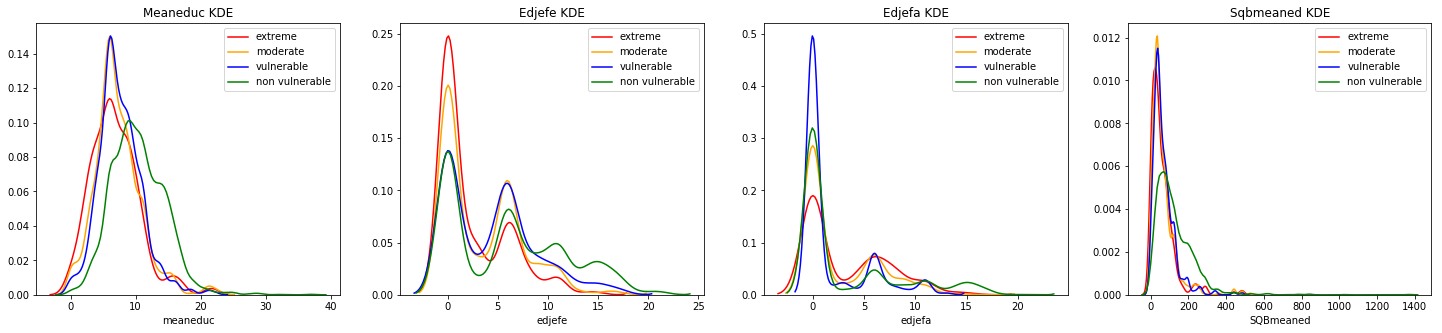

In [49]:
#Firstly,find the relationship between edjefe(float64),edjefa(float64),meaneduc(float64),SQBmeaned(float64) and target
plt.figure(figsize = (25, 5))
colors = dict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
label_mapping = dict({1: 'extreme', 2: 'moderate', 3: 'vulnerable',4: 'non vulnerable'})

for i, col in enumerate(['meaneduc','edjefe','edjefa','SQBmeaned']):
    ax = plt.subplot(1, 4, i + 1)
    # Iterate through the poverty levels
    for poverty_level, color in colors.items():
        # kernel density estimation
        sns.kdeplot(train.loc[train['Target'] == poverty_level, col].dropna(), 
                    ax = ax, color = color, label = label_mapping[poverty_level])

    plt.title('%s KDE'%(col.capitalize()))
    plt.xlabel('%s'%col)

# from the plot, we find that: There were a significant positive correlation between target and years of education of adult

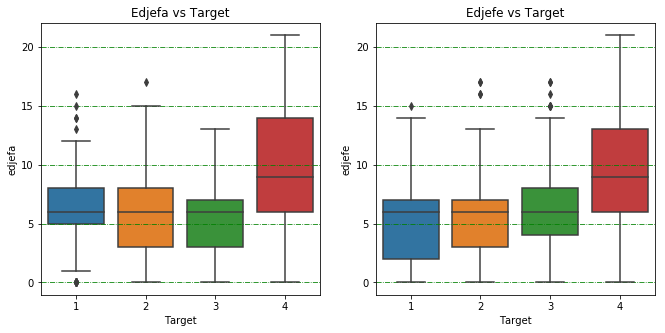

In [92]:
#secondly, using boxplot to find relationship between edjefe,edjefa and target.
#edjefe:years of education of male head of household    edjefa:years of education of female head of household
#key point: household, male, female
plt.figure(figsize = (11, 5))
household = train[train['parentesco1'] == 1].copy()

for i, col in enumerate([ 'edjefa', 'edjefe']):
    ax = plt.subplot(1, 2,i+1)
    # boxplot colored by `Target`
    sns.boxplot(x = 'Target', y = col , data = household.loc[household['male'] == i])
    plt.title('%s vs Target'%(col.capitalize()))
    plt.grid(axis = 'y', color = 'green', linestyle ='-.')

#from the plot, we can get two conclusion:
#(1) There were a significant positive correlation between target and years of education of household
#(2) In every poverty-level family, the average years of education of female is a little bit larger that male's.

In [105]:
#Then,find the relationship between instlevel and target
instlevel1 = train.pop('instlevel1')
instlevel2 = train.pop('instlevel2')
instlevel3 = train.pop('instlevel3')
instlevel4 = train.pop('instlevel4')
instlevel5 = train.pop('instlevel5')
instlevel6 = train.pop('instlevel6')
instlevel7 = train.pop('instlevel7')
instlevel8 = train.pop('instlevel8')
instlevel9 = train.pop('instlevel9')

In [106]:
instlevel = instlevel1+2*instlevel2+3*instlevel3+4*instlevel4+5*instlevel5+6*instlevel6+7*instlevel7+8*instlevel8+9*instlevel9
train.insert(0,'instlevel',instlevel)
train['instlevel'].head()

0    4
1    8
2    5
3    4
4    5
Name: instlevel, dtype: int64

Text(0.5,0,'instlevel')

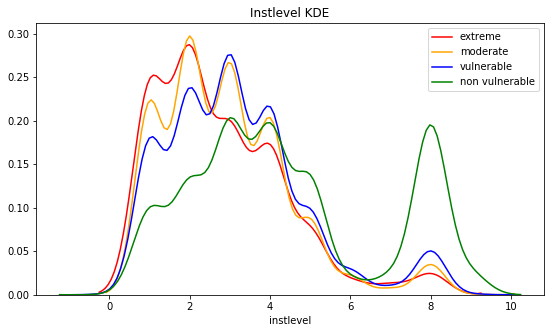

In [127]:
plt.figure(figsize = (20, 5))
colors = dict({1: 'red', 2: 'orange', 3: 'blue', 4: 'green'})
label_mapping = dict({1: 'extreme', 2: 'moderate', 3: 'vulnerable',4: 'non vulnerable'})

ax = plt.subplot(1, 2, i + 1)
# Iterate through the poverty levels
for poverty_level, color in colors.items():
    # kernel density estimation
    sns.kdeplot(train.loc[train['Target'] == poverty_level, 'instlevel'].dropna(), 
                ax = ax, color = color, label = label_mapping[poverty_level])

plt.title('%s KDE'%('instlevel'.capitalize()))
plt.xlabel('%s'% 'instlevel')
# from the plot, we find that: There were a significant positive correlation between target and education background